In [2]:
import powerlaw
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
import random


In [3]:
#Read in csv files
onek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv"
twok_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv"
threek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv"
fourk_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv"
all_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_full_occurances_t01_smarts_unique.csv"
sample_labels = {"Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv": "1k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv": "2k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv": "3k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv": "4k Samples",
                "Biology/Data/KEGG_Samples/KEGG_fragments_full_occurances_t01_smarts_unique.csv": "Full KEGG"}

In [4]:
#Power law fits
full_df = pd.read_csv(all_fp)
results = powerlaw.Fit(full_df["Occurances"].tolist())
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p) #R is negative if the second fit is better, p is significant value for that direction)

Calculating best minimal value for power law fit
/Users/John/anaconda2/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.613439487971086
1178.0
(0.03616701269175682, 0.7950350434866902)


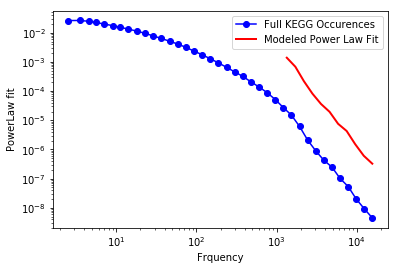

In [5]:
#Power law plotting
powerlaw.plot_pdf(full_df["Occurances"].tolist(), color="b", marker="o", label="Full KEGG Occurences")
results.plot_pdf(color="r", linewidth=2, label="Modeled Power Law Fit")
plt.xlabel("Frquency")
plt.ylabel("PowerLaw fit")
plt.legend()

In [8]:
#Distribution fits
def find_best_distribution(data):
  dist_names = ['powerlaw','weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

  chi_square_statistics = []
  # 11 equi-distant bins of observed Data 
  percentile_bins = np.linspace(0,100,11)
  percentile_cutoffs = np.percentile(data, percentile_bins)
  observed_frequency, bins = (np.histogram(data, bins=percentile_cutoffs))
  cum_observed_frequency = np.cumsum(observed_frequency)

  # Loop through candidate distributions
  for distribution in dist_names:
      # Set up distribution and get fitted distribution parameters
      dist = getattr(stats, distribution)
      param = dist.fit(data)
      #print("{}\n{}\n".format(dist, param))


      # Get expected counts in percentile bins
      # cdf of fitted sistrinution across bins
      cdf_fitted = dist.cdf(percentile_cutoffs, *param)
      expected_frequency = []
      for bin in range(len(percentile_bins)-1):
          expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
          expected_frequency.append(expected_cdf_area)

      # Chi-square Statistics
      expected_frequency = np.array(expected_frequency) * len(data)
      cum_expected_frequency = np.cumsum(expected_frequency)
      ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
      chi_square_statistics.append(ss)


  #Sort by minimum ch-square statistics
  results = pd.DataFrame()
  results['Distribution'] = dist_names
  results['chi_square'] = chi_square_statistics
  results.sort_values(['chi_square'], inplace=True)


  print ('\nDistributions listed by Betterment of fit:')
  print ('............................................')
  print (results)


In [9]:
for fp in [all_fp]:#[onek_fp, twok_fp, threek_fp, fourk_fp]:
    df = pd.read_csv(fp) 
    find_best_distribution(df["Occurances"].tolist())


Distributions listed by Betterment of fit:
............................................
   Distribution    chi_square
9       lognorm  1.772369e+03
5      invgauss  1.069646e+04
4          beta  2.611699e+04
10     pearson3  2.707349e+04
1   weibull_min  9.829166e+04
8         expon  4.194494e+05
0      powerlaw  5.241450e+05
2          norm  1.972218e+06
7         gamma  2.741184e+06
11       triang  2.896768e+06
6       uniform  2.959818e+06
3   weibull_max  3.049720e+06


ValueError: lognormal is not a valid distribution name

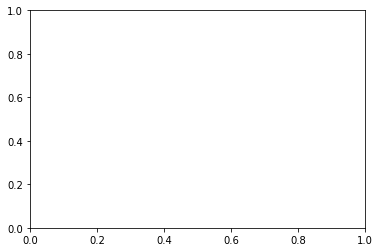

In [13]:
#Probplot of lognormal distribution
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(full_df["Occurances"], dist="lognormal", plot=ax, sparams=(1,))
#//TODO: what is this shape parameter? (and why does 1 work so well)
ax.set_title("Probplot for Full KEGG Data with lognormal distribution with shape parameter 1")
plt.show()

# Distribution Comparisons
KS & Anderson-Darling tests

In [2]:
onek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_1000cpds_occurances.csv"
onek_df = pd.read_csv(onek_fp)

twok_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_2000cpds_occurances.csv"
twok_df = pd.read_csv(twok_fp)

threek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_3000cpds_occurances.csv"
threek_df = pd.read_csv(threek_fp)

fourk_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_4000cpds_occurances.csv"
fourk_df = pd.read_csv(fourk_fp)

fivek_fp = "Biology/Data/KEGG_Samples/KEGG_fragments_5000cpds_occurances.csv"
fivek_df = pd.read_csv(fivek_fp)

In [3]:
#1k and 4k
print("KS")
print(stats.ks_2samp(onek_df["Occurances"], fourk_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([onek_df["Occurances"].tolist(), fourk_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.15312247343239316, pvalue=0.0)
Anderson Darling
Anderson_ksampResult(statistic=2437.0141266109986, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)


/Users/John/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [18]:
#3k and 4k
print("KS")
print(stats.ks_2samp(threek_df["Occurances"], fourk_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([threek_df["Occurances"].tolist(), fourk_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.03063985937499636, pvalue=3.8950466305907957e-60)
Anderson Darling
Anderson_ksampResult(statistic=249.64374974878888, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)


In [4]:
#4k and 5k
print("KS")
print(stats.ks_2samp(fourk_df["Occurances"], fivek_df["Occurances"]))
print("Anderson Darling")
print(stats.anderson_ksamp([fourk_df["Occurances"].tolist(), fivek_df["Occurances"].tolist()]))

KS
Ks_2sampResult(statistic=0.03057877608518339, pvalue=5.059552959783144e-83)
Anderson Darling
Anderson_ksampResult(statistic=389.37909519917815, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=inf)


# Timeout Test comparisons

In [12]:
#Compare variations within timeout parameters - using Welch's t-test & KS test on random combinations
t0_001_files = []
t0_01_files =[]
t0_1_files = []
t1_files = []
for f in os.listdir("Biology/Data/Tests/Timeout/"):
    if "0_001_" in f and f.endswith(".csv"):
        t0_001_files.append("Biology/Data/Tests/Timeout/" + f)
    elif "0_01_" in f and f.endswith(".csv"):
        t0_01_files.append("Biology/Data/Tests/Timeout/" + f)
    elif "0_1_" in f and f.endswith(".csv"):
        t0_1_files.append("Biology/Data/Tests/Timeout/" + f)
    elif "t1_" in f and f.endswith(".csv"):
        t1_files.append("Biology/Data/Tests/Timeout/" + f)
        
            
#print(t0_001_files)
print(t1_files)
#             df = pd.read_csv("Biology/Data/Tests/Timeout/" + f)
#             occurances = df["Occurances"].tolist()
#             print(len(occurances))
            
#             #x & y vals, all normalized to 1
#             yvals = sorted(list(map(int, occurances)), reverse=True)
#             yvals = minmax_scale(yvals) #Normalize yvals to 1
#             print(len(yvals))
#             xvals = np.linspace(0, 1, num=len(yvals))
#             print(len(xvals))

['Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter0smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter1smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter2smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter3smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter4smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter5smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter6smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter7smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter8smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout1_iter9smarts_unique_occurances.csv']

In [21]:
def load_occurances(fp):
    df = pd.read_csv(fp)
    return df["Occurances"].tolist()

In [26]:
#Get random combinations of files
for i in range(10):
    f1, f2 = random.sample(t0_01_files, 2)
    print(f1, f2)
    o1 = load_occurances(f1)
    o2 = load_occurances(f2)
    
    s, p = stats.ttest_ind(o1, o2, equal_var=False)
    ks_s, ks_p = stats.ks_2samp(o1, o1)
    print(s, p)
    print(ks_s, ks_p)

('Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter1smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter2smarts_unique_occurances.csv')
(0.1086126701544121, 0.9135101062685348)
(0.0, 1.0)
('Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter8smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter9smarts_unique_occurances.csv')
(-0.6080086523565897, 0.5431845648056115)
(0.0, 1.0)
('Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter8smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter1smarts_unique_occurances.csv')
(6.595579068039138, 4.2771158518473946e-11)
(0.0, 1.0)
('Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter6smarts_unique_occurances.csv', 'Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_01_iter4smarts_unique_occurances.csv')
(-0.35286319

In [29]:
#Differences between avg distributions for all timeout parameters (especially between 0.001 and others)
f_001 = random.sample(t0_001_files, 1)
o_001 = load_occurances(f_001[0])

f_01 = random.sample(t0_01_files, 1)
o_01 = load_occurances(f_01[0])

f_1 = random.sample(t0_1_files, 1)
o_1 = load_occurances(f_1[0])

f1 = random.sample(t1_files, 1)
o1 = load_occurances(f1[0])

['Biology/Data/Tests/Timeout/KEGG_fragments_1000samples_timeout0_001_iter2smarts_unique_occurances.csv']


In [33]:
#KS between 0.001 and 1
print(stats.ks_2samp(o_001, o1))

#Between 0.001 and 0.1
print(stats.ks_2samp(o_001, o_1))

#Between 0.001 and 0.01
print(stats.ks_2samp(o_001, o_01))

Ks_2sampResult(statistic=0.3032361963407073, pvalue=8.671236697759973e-269)
Ks_2sampResult(statistic=0.27286495526157156, pvalue=3.531107309471674e-218)
Ks_2sampResult(statistic=0.17944151921048712, pvalue=1.351031888593377e-91)


In [34]:
#KS between 0.01 and 1
print(stats.ks_2samp(o_01, o1))

#Between 0.01 and 0.1
print(stats.ks_2samp(o_01, o_1))

Ks_2sampResult(statistic=0.17934838374163242, pvalue=0.0)
Ks_2sampResult(statistic=0.1339932109549064, pvalue=1.9606336573632535e-221)


In [35]:
#KS between 0.1 and 1
print(stats.ks_2samp(o_1, o1))

Ks_2sampResult(statistic=0.04818362428297451, pvalue=2.7974592049033237e-33)
